In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

dataset, info = tfds.load('tf_flowers', split='train', with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [2]:
def preprocess(example):
    image = example['image']
    label = example['label']
    image = tf.image.resize(image, (150, 150))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


dataset = dataset.map(preprocess)

In [3]:
train_size = info.splits['train'].num_examples
train_dataset = dataset.take(train_size * 80 // 100)
test_dataset = dataset.skip(train_size * 80 // 100)

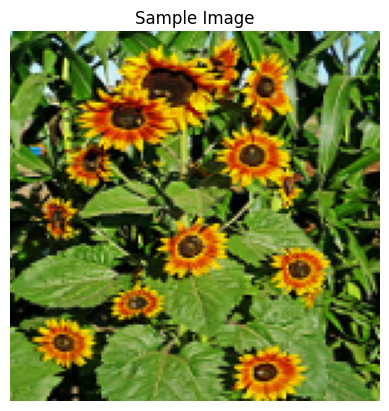

In [4]:
train_dataset = train_dataset.shuffle(1000).batch(32)
test_dataset = test_dataset.batch(32)

for image, label in train_dataset.take(1):
    plt.figure()
    plt.imshow(image[0])
    plt.title('Sample Image')
    plt.axis('off')
    plt.show()
    break

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(train_dataset, epochs=5, validation_data=test_dataset,
                    callbacks=[reduce_lr])


Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.3728 - loss: 1.4281 - val_accuracy: 0.4796 - val_loss: 1.2154 - learning_rate: 0.0010
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.5572 - loss: 1.0681 - val_accuracy: 0.5763 - val_loss: 0.9925 - learning_rate: 0.0010
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.6394 - loss: 0.8924 - val_accuracy: 0.6485 - val_loss: 0.8863 - learning_rate: 0.0010
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.6783 - loss: 0.8299 - val_accuracy: 0.6866 - val_loss: 0.8126 - learning_rate: 0.0010
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.7144 - loss: 0.6984 - val_accuracy: 0.6962 - val_loss: 0.7664 - learning_rate: 0.0010


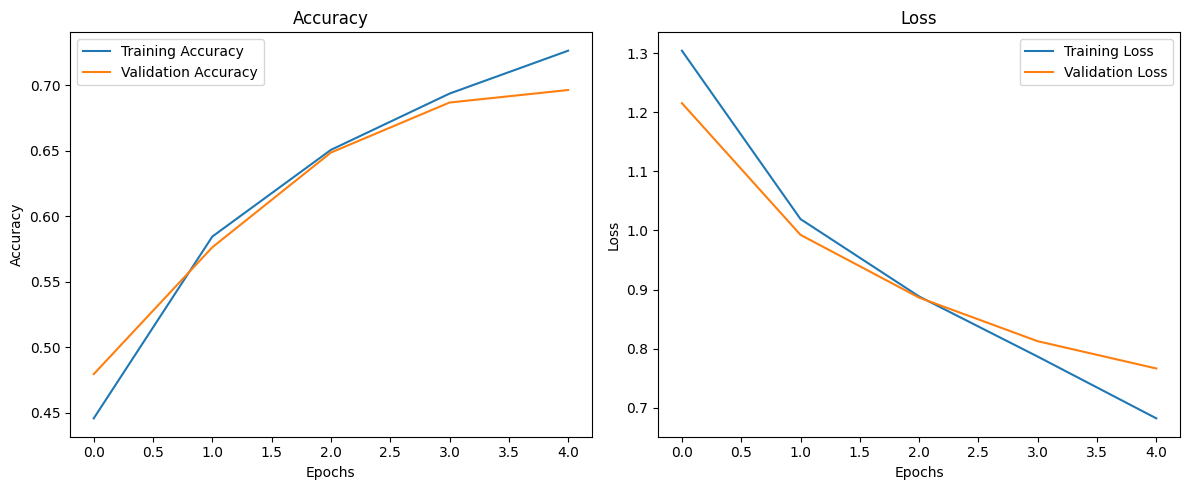

In [8]:
plt.figure(figsize=(12, 5))


# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()